<a href="https://colab.research.google.com/github/BHUVANAN8/Projects/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNSUPERVISED MACHINE LEARNING**

**MALL CUSTOMER SEGMENTATION:** 
The aim of the project is to clustering the group of peoples  by using K means clustering algorithm. The dataset used is Mall Customer Segmentation Data set from Kaggle API.

**Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
print('setup complete')

setup complete


**Data collection**

In [ ]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#print the no of rows and columns
customer_data.shape

(200, 5)

In [ ]:
#first 5 rows and column in the dataset
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Missing values
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Data Analysis and Data visualization**



In [ ]:
#statistical measures
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Correlation')

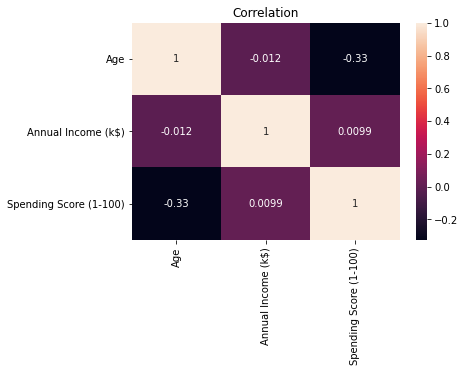

In [ ]:
#correlation
sns.heatmap(customer_data.drop(['CustomerID'],axis=1).corr(),annot=True)
plt.title('Correlation')

After the heatmap observation age is inversely proportional to annual income and spending score

In [ ]:
#choosing annual income column and spending score
X = customer_data.iloc[:, [3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
#choosing the number of clusters using wcss
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=10)
  kmeans.fit(X)

  WCSS.append(kmeans.inertia_)

No handles with labels found to put in legend.


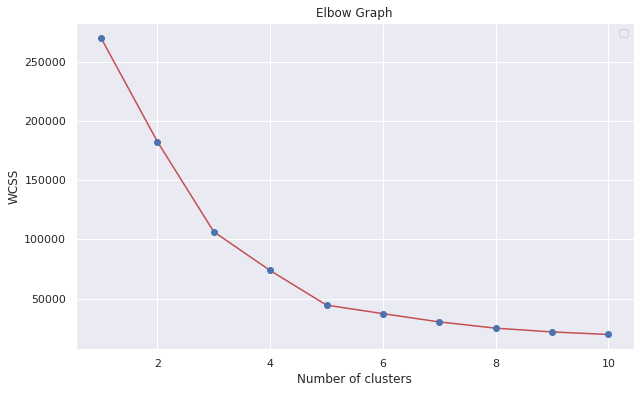

In [ ]:
#Plot an elbow graph
sns.set()
plt.figure(figsize=(10,6))
plt.plot(range(1,11), WCSS, c='r')
plt.plot(range(1,11), WCSS, 'o')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Optimum number of clusters  = 5

**Training the K-Means clustering model**

In [ ]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=0)
Y = kmeans.fit_predict(X)
print(Y)
#find and count the unique values
clusters = np.unique(Y)
print(np.unique(Y))
print('optimum number of clusters:', len(clusters))




[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]
[0 1 2 3 4]
optimum number of clusters: 5


5 clusters : 0,1,2,3,4

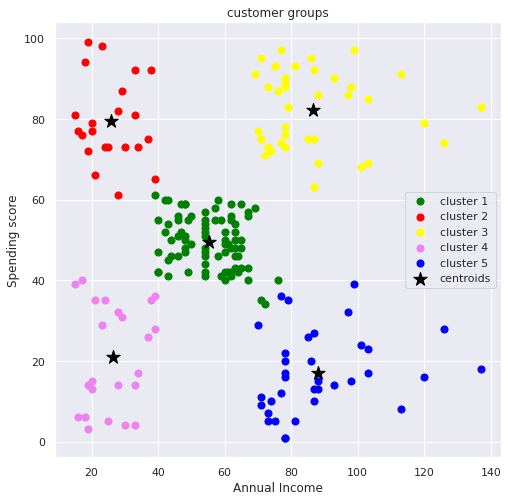

In [ ]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s= 50, c = 'green', label= 'cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s= 50, c= 'red' , label= 'cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s= 50, c= 'yellow', label= 'cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s= 50, c='violet', label= 'cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s= 50,  c= 'blue', label= 'cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c= "black", marker='*', label = 'centroids')
plt.title('customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()


In [ ]:
From the above plots we can interpret the clusters as following:

Cluster1 :Customers with MEDIUM Income and MEDIUM spending score.
Cluster2 :Customers with LOW Income and HIGH spending score.
Cluster3 :Customers with HIGH Income and HIGH spending score.
Cluster4 :Customers with low Income and LOW spending score.
Cluster5 :Customers with HIGH Income and LOW spending score.
